# Crime classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from Imbalanced_dataset_utility import *

# 

### Load and display the dataset

In [2]:
# Loading and displaying the rows of the dataset

dat = pd.read_csv("CrimeClassification.csv")
dat.head()

,Hour,DayOfWeek,Month,Year,PdDistrict,Address,ViolentCrime
0,10,6,7,2005,INGLESIDE,'800 Block of SAN JOSE AV',No
1,10,4,1,2014,CENTRAL,'400 Block of POST ST',No
2,16,3,8,2007,CENTRAL,'500 Block of GEARY ST',No
3,5,7,1,2010,NORTHERN,'600 Block of LARKIN ST',No
4,1,3,6,2008,SOUTHERN,'8TH ST / BRANNAN ST',No


### Balancing and preprocessing the dataset

In [4]:
data = create_imbalanced_data_for_crime(0.50, 2250)
data = preprocessing_crime(data)
print(imbalance([data["ViolentCrime"].value_counts()[0], data["ViolentCrime"].value_counts()[1]]))


[50.75508864084045, 49.24491135915955]


### Plotting all the columns after encoding is done

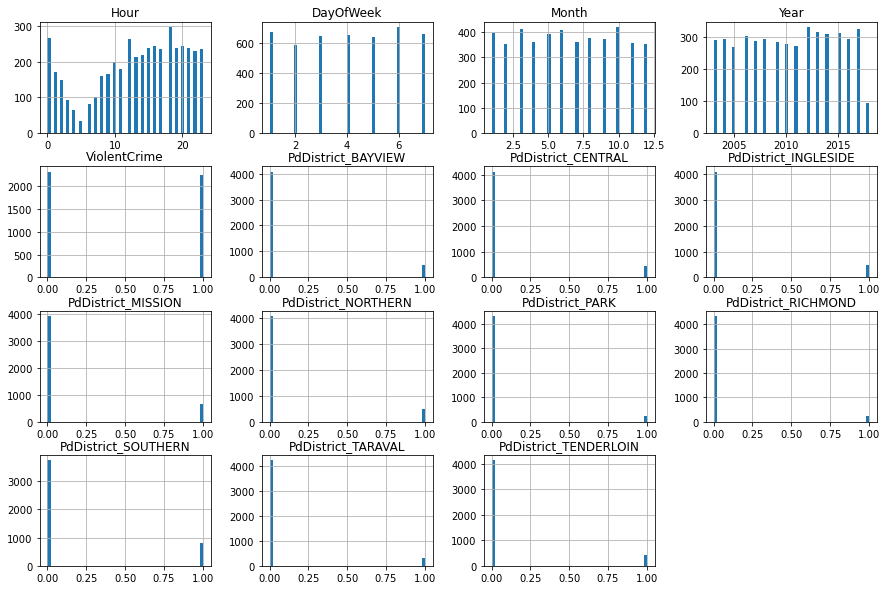

In [5]:


_ = data.hist(bins=50, figsize=(15,10))

# 

### Plotting a correlation matrix

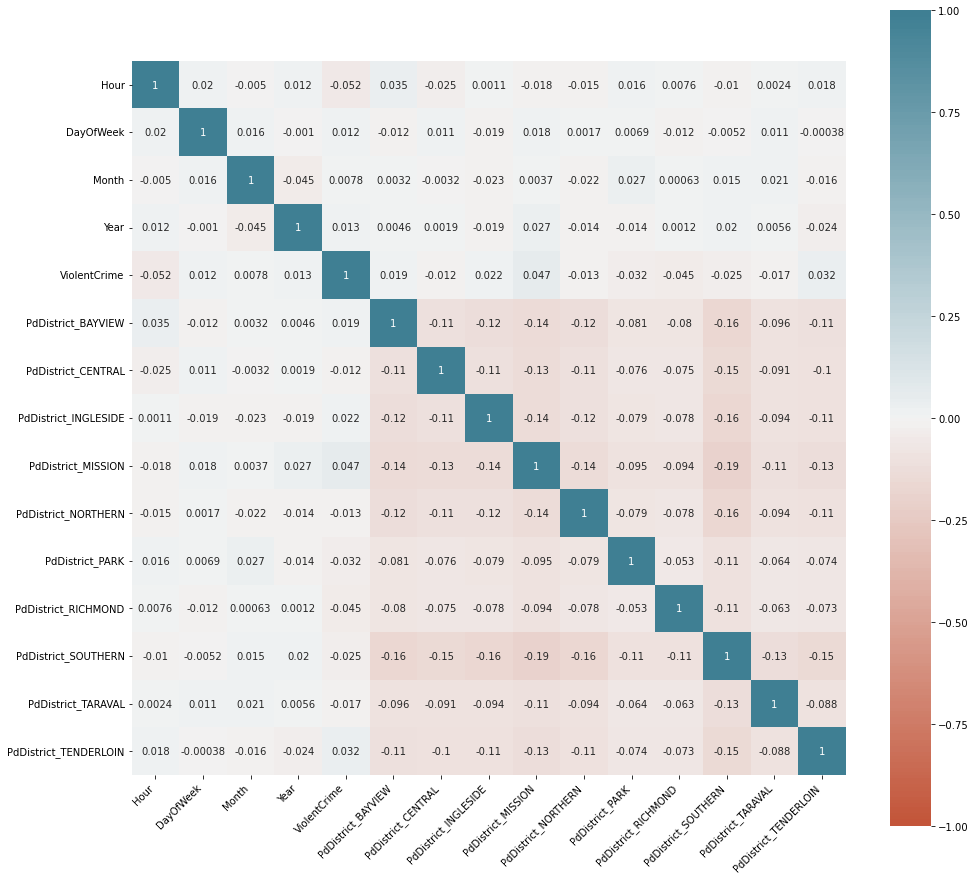

In [6]:


plt.figure(figsize = (16,15))
ax = sn.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Creating a random forest classifier as a baseline on the original dataset

In [8]:
Y_df = data["ViolentCrime"]
X_df = data
X_df = X_df.drop("ViolentCrime", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=700, max_depth=6)

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_4188/2043737152.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("ViolentCrime", 1)


--------------Scores------------
[0.47213115 0.51671733 0.44805195 0.45425868 0.50455927 0.47169811
 0.53968254 0.48208469 0.4527027  0.43037975]
F1 score: 0.48 +/- 0.03


# 

## Dataset with low imbalance (65%)

In [9]:
data_imbalanced_1 = create_imbalanced_data_for_crime(0.65, 2250)
data_imbalanced_1 = preprocessing_crime(data_imbalanced_1)
print(imbalance([data_imbalanced_1["ViolentCrime"].value_counts()[0], data_imbalanced_1["ViolentCrime"].value_counts()[1]]))


[65.69405099150141, 34.30594900849858]


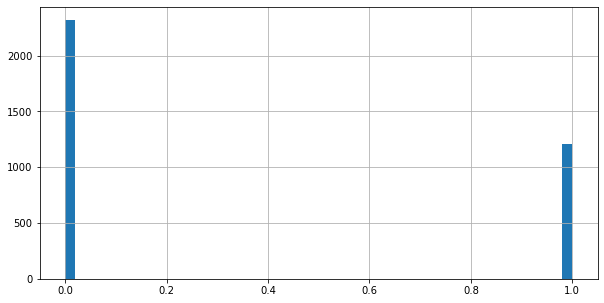

In [10]:
_ = data_imbalanced_1["ViolentCrime"].hist(bins=50, figsize=(10,5))

### Creating a random forest classifier model on dataset with low imbalance

In [11]:
Y_df = data_imbalanced_1["ViolentCrime"]
X_df = data_imbalanced_1
X_df = X_df.drop("ViolentCrime", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=50)

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_4188/4026724641.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("ViolentCrime", 1)


--------------Scores------------
[0.26573427 0.31944444 0.2147651  0.28767123 0.27142857 0.23684211
 0.32679739 0.29411765 0.33802817 0.2875    ]
F1 score: 0.28 +/- 0.04


# 

### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with low imbalance


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


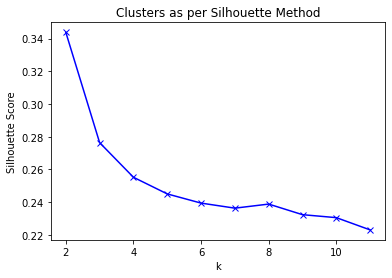

Enter number of clusters for the silhouette graph: 2


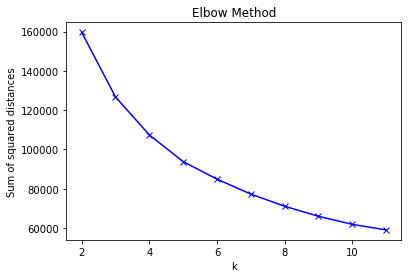

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.557733352662711 for n_clusters = 2
Run  1  is now complete...
-------------------------------
Run number:  2


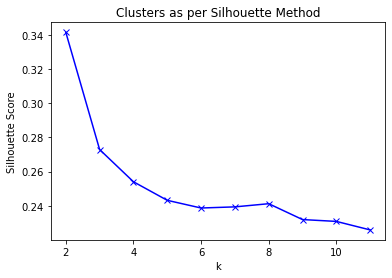

Enter number of clusters for the silhouette graph: 2


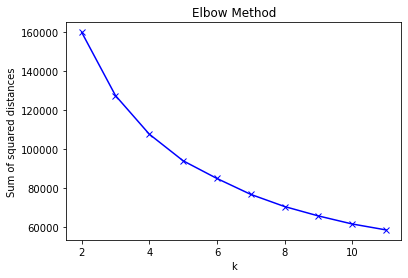

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.5611681593178091 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


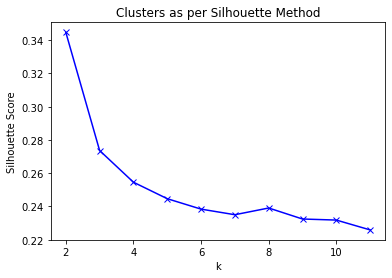

Enter number of clusters for the silhouette graph: 2


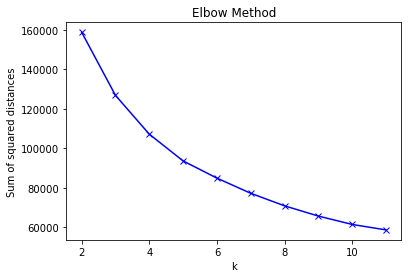

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5627415577202404 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


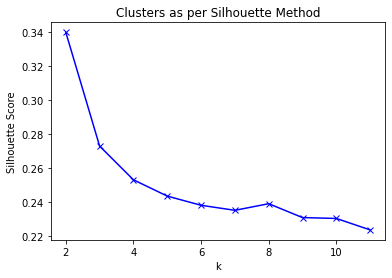

Enter number of clusters for the silhouette graph: 2


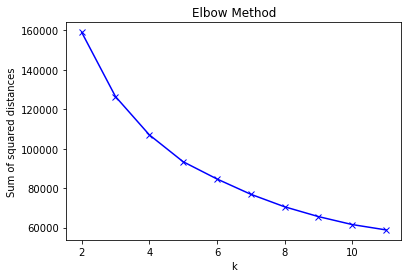

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.42712698932681437 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


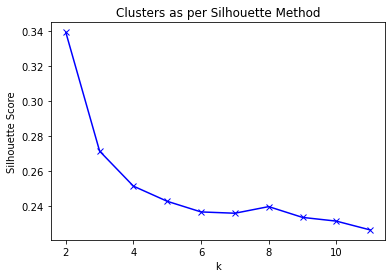

Enter number of clusters for the silhouette graph: 2


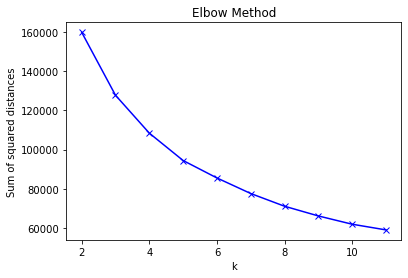

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.4325159198822113 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


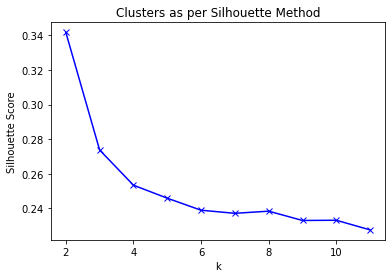

Enter number of clusters for the silhouette graph: 2


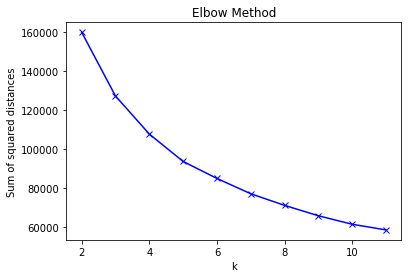

Enter number of clusters for the elbow graph: 2
Best performing clustering F1-score is: 0.561751247568269 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


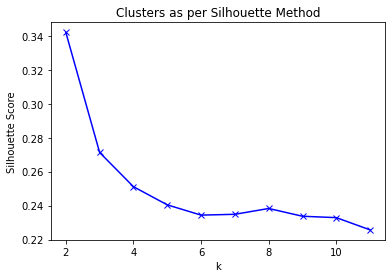

Enter number of clusters for the silhouette graph: 2


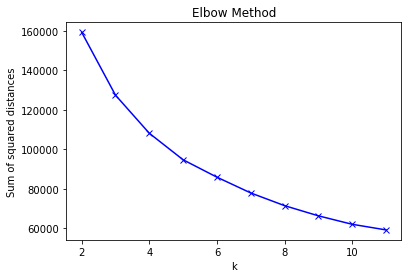

Enter number of clusters for the elbow graph: 7
Best performing clustering F1-score is: 0.4289803506319605 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


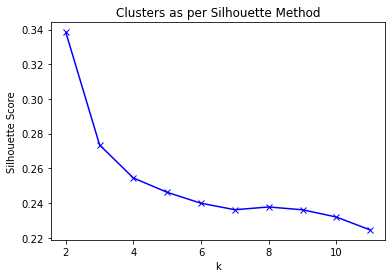

Enter number of clusters for the silhouette graph: 2


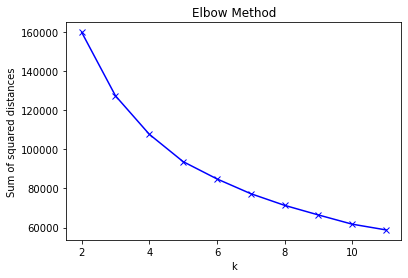

Enter number of clusters for the elbow graph: 4
Best performing clustering F1-score is: 0.4285266159916363 for n_clusters = 2
Run  8  is now complete...
-------------------------------
Run number:  9


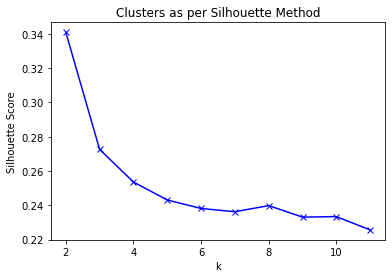

Enter number of clusters for the silhouette graph: 2


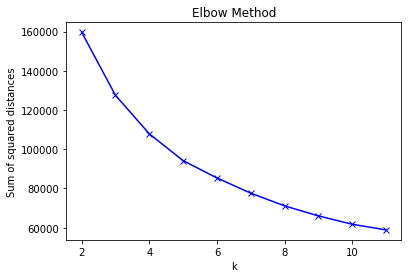

Enter number of clusters for the elbow graph: 6
Best performing clustering F1-score is: 0.5611681593178091 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


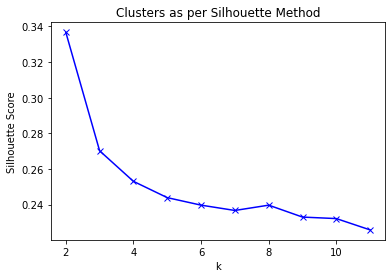

Enter number of clusters for the silhouette graph: 2


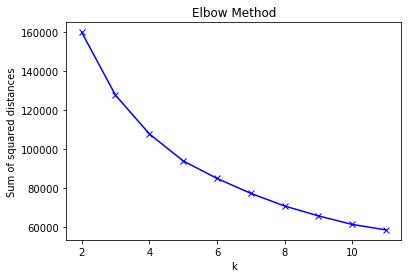

Enter number of clusters for the elbow graph: 9
Best performing clustering F1-score is: 0.5601779439694934 for n_clusters = 2
Run  10  is now complete...
-------------------------------


In [12]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [13]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.6601 +/- 0.0078
PRECISION: 0.9278 +/- 0.0204
ACCURACY: 0.6601 +/- 0.0078
F1: 0.7593 +/- 0.0113


### 

### Box plots comparing the two models 

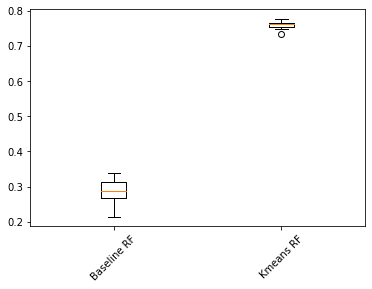

In [14]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

## Dataset with medium imbalance (75%)

In [36]:
data_imbalanced_2 = create_imbalanced_data_for_crime(0.75, 2250)
data_imbalanced_2 = preprocessing_crime(data_imbalanced_2)
print(imbalance([data_imbalanced_2["ViolentCrime"].value_counts()[0], data_imbalanced_2["ViolentCrime"].value_counts()[1]]))




[75.56207233626589, 24.437927663734115]


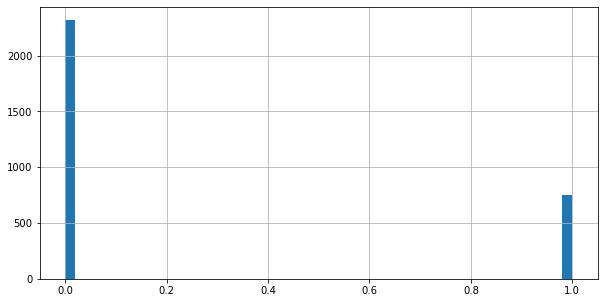

In [37]:
_ = data_imbalanced_2["ViolentCrime"].hist(bins=50, figsize=(10,5))

# 

### Creating a random forest classifier model on dataset with medium imbalance

In [38]:
Y_df = data_imbalanced_2["ViolentCrime"]
X_df = data_imbalanced_2
X_df = X_df.drop("ViolentCrime", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
clf = RandomForestClassifier(n_estimators=50)

base_scores = cross_val_score(clf, trainX, trainY, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_4188/302440738.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("ViolentCrime", 1)


--------------Scores------------
[0.1038961  0.14117647 0.1038961  0.17948718 0.02666667 0.15
 0.20512821 0.05333333 0.08108108 0.16091954]
F1 score: 0.12 +/- 0.05


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with medium imbalance


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


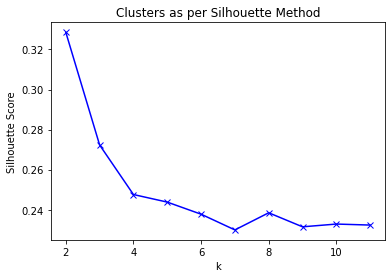

Enter number of clusters for the silhouette graph: 2


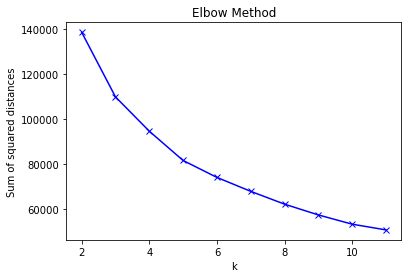

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5404929940028571 for n_clusters = 2
Run  1  is now complete...
-------------------------------
Run number:  2


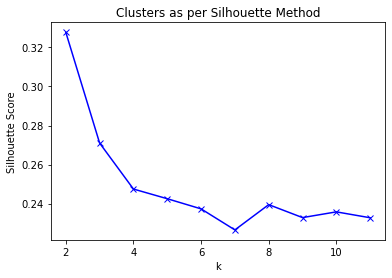

Enter number of clusters for the silhouette graph: 2


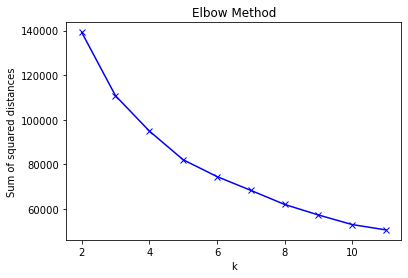

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5338524819706687 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


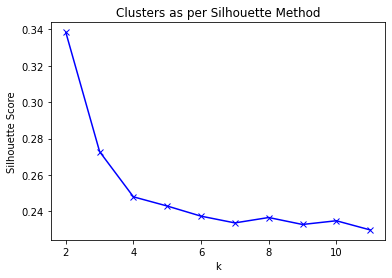

Enter number of clusters for the silhouette graph: 2


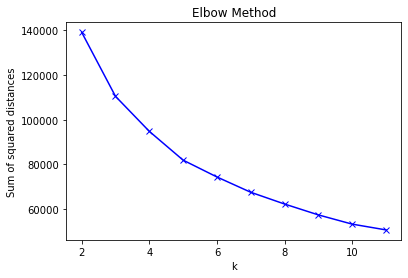

Enter number of clusters for the elbow graph: 7
Best performing clustering F1-score is: 0.5647254600954189 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


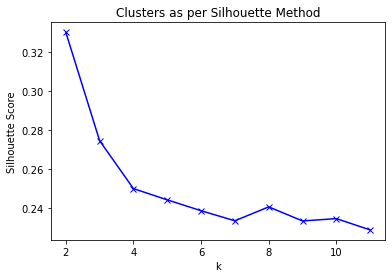

Enter number of clusters for the silhouette graph: 2


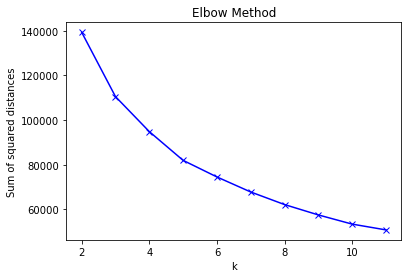

Enter number of clusters for the elbow graph: 10
Best performing clustering F1-score is: 0.40532040603806435 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


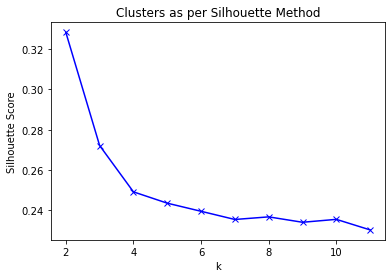

Enter number of clusters for the silhouette graph: 2


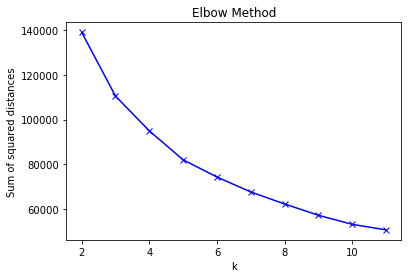

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5318267494126951 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


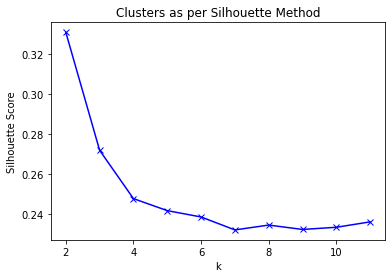

Enter number of clusters for the silhouette graph: 2


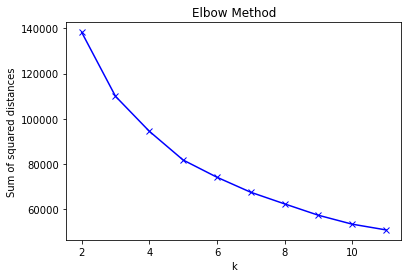

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.40564623898984437 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


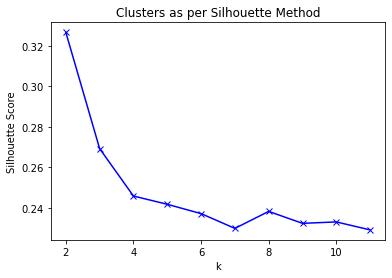

Enter number of clusters for the silhouette graph: 2


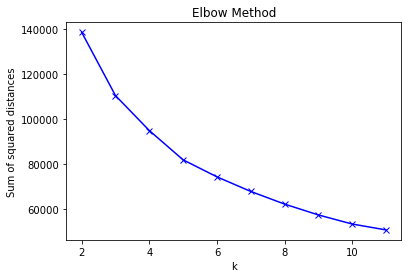

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.40226818810241405 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


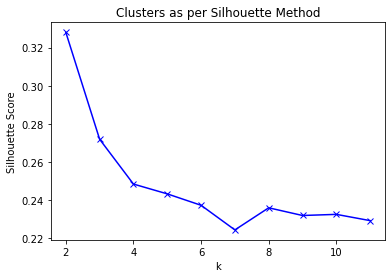

Enter number of clusters for the silhouette graph: 2


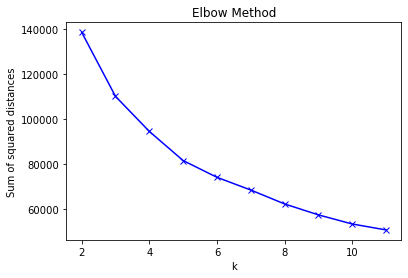

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.4053413593718104 for n_clusters = 2
Run  8  is now complete...
-------------------------------
Run number:  9


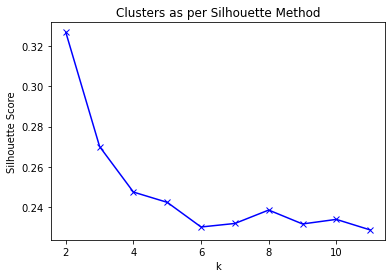

Enter number of clusters for the silhouette graph: 2


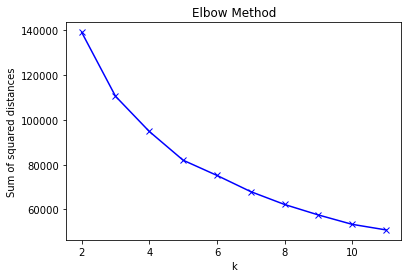

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5354547974378503 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


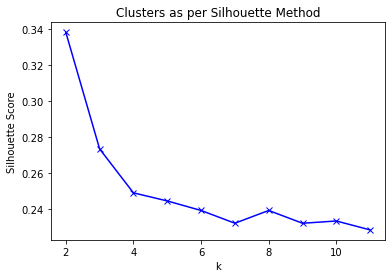

Enter number of clusters for the silhouette graph: 2


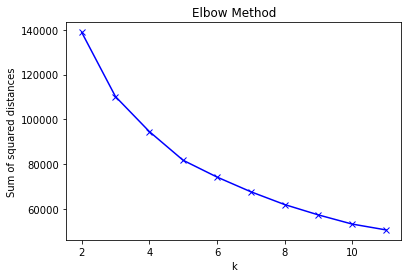

Enter number of clusters for the elbow graph: 11
Best performing clustering F1-score is: 0.5671675742278861 for n_clusters = 2
Run  10  is now complete...
-------------------------------


In [39]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [40]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.7550 +/- 0.0021
PRECISION: 0.9974 +/- 0.0034
ACCURACY: 0.7550 +/- 0.0021
F1: 0.8592 +/- 0.0023


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

#### 

### Box plots comparing the two models 

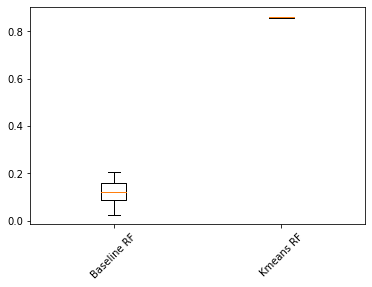

In [41]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()

## Dataset with high imbalance (90%)

In [42]:
# data_imbalanced_3 = create_imbalanced_data_for_crime(0.90, 249250)
data_imbalanced_3 = create_imbalanced_data_for_crime(0.90, 2250)
data_imbalanced_3 = preprocessing_crime(data_imbalanced_3)
print(imbalance([data_imbalanced_3["ViolentCrime"].value_counts()[0], data_imbalanced_3["ViolentCrime"].value_counts()[1]]))




[90.26858699883223, 9.73141300116777]


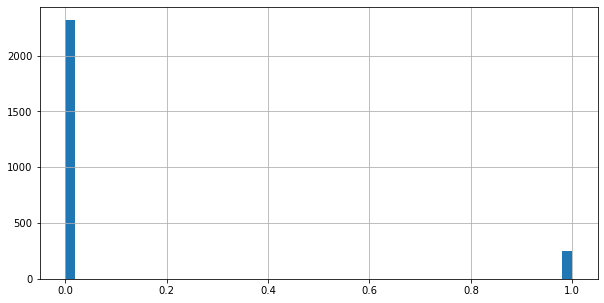

In [43]:
_ = data_imbalanced_3["ViolentCrime"].hist(bins=50, figsize=(10,5))

# 

### Creating a random forest classifier model on dataset with high imbalance 

In [44]:
Y_df = data_imbalanced_3["ViolentCrime"]
X_df = data_imbalanced_3
X_df = X_df.drop("ViolentCrime", 1)

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# Create separate training and test sets. we'll use the training set for steps 3--6
trainX, testX, trainY, testY = train_test_split(X_df, Y_df, test_size=0.2, random_state=50, stratify=Y_df)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix

clf = RandomForestClassifier(n_estimators=50)
print('clf-', clf)

base_scores = cross_val_score(clf, X_df, Y_df, cv=10,scoring=make_scorer(f1_score))
print("--------------Scores------------")
print(base_scores)

print("F1 score: %0.2f +/- %0.2f" % (base_scores.mean(), base_scores.std()))

clf- RandomForestClassifier(n_estimators=50)


/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_4188/1190909147.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("ViolentCrime", 1)


--------------Scores------------
[0.         0.         0.         0.         0.         0.07692308
 0.         0.         0.         0.        ]
F1 score: 0.01 +/- 0.02


In [45]:
Y_df = data_imbalanced_3["ViolentCrime"]
X_df = data_imbalanced_3
X_df = X_df.drop("ViolentCrime", 1)

/var/folders/g6/cbrxd1b14jj3gqydktn3pb_m0000gn/T/ipykernel_4188/264570511.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = X_df.drop("ViolentCrime", 1)


### Creating the hybrid model and displaying the silhouette and elbow graphs on dataset with high imbalance 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Run number:  1


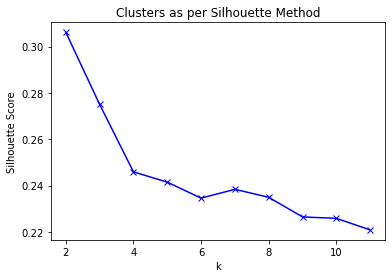

Enter number of clusters for the silhouette graph: 2


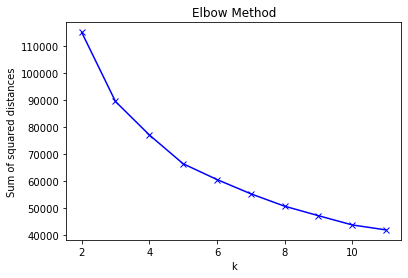

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5059973183860051 for n_clusters = 2
Run  1  is now complete...
-------------------------------
Run number:  2


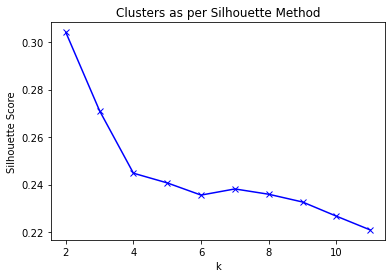

Enter number of clusters for the silhouette graph: 2


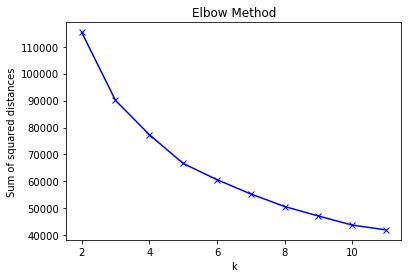

Enter number of clusters for the elbow graph: 8
Best performing clustering F1-score is: 0.3140765261035686 for n_clusters = 2
Run  2  is now complete...
-------------------------------
Run number:  3


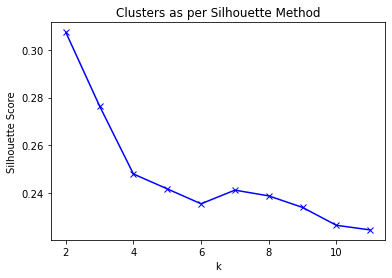

Enter number of clusters for the silhouette graph: 2


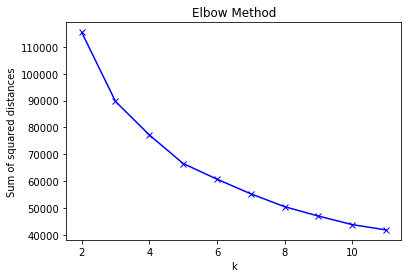

Enter number of clusters for the elbow graph: 7
Best performing clustering F1-score is: 0.5086196945011658 for n_clusters = 2
Run  3  is now complete...
-------------------------------
Run number:  4


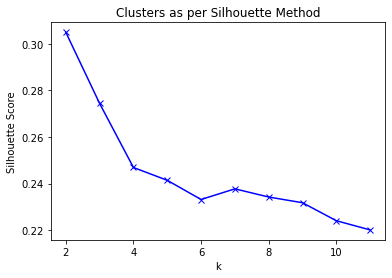

Enter number of clusters for the silhouette graph: 2


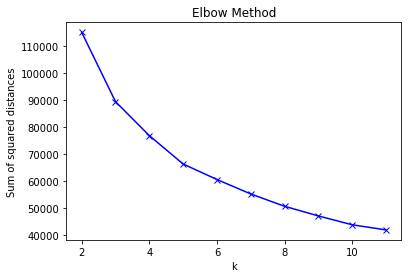

Enter number of clusters for the elbow graph: 8
Best performing clustering F1-score is: 0.4992338379467575 for n_clusters = 2
Run  4  is now complete...
-------------------------------
Run number:  5


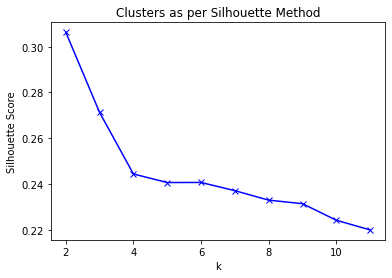

Enter number of clusters for the silhouette graph: 2


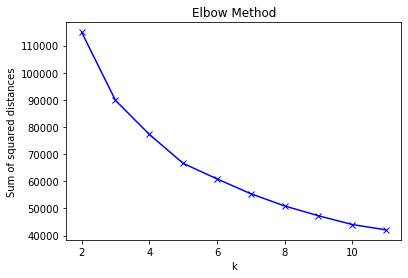

Enter number of clusters for the elbow graph: 5
Best performing clustering F1-score is: 0.507025512581889 for n_clusters = 2
Run  5  is now complete...
-------------------------------
Run number:  6


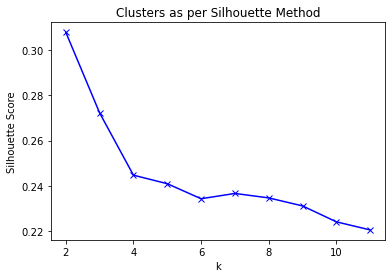

Enter number of clusters for the silhouette graph: 2


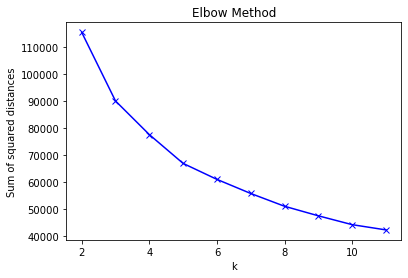

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.5137766178906069 for n_clusters = 2
Run  6  is now complete...
-------------------------------
Run number:  7


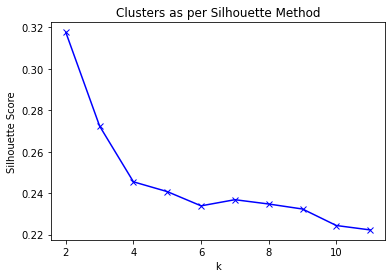

Enter number of clusters for the silhouette graph: 2


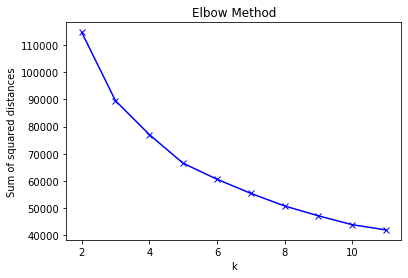

Enter number of clusters for the elbow graph: 5
Best performing clustering F1-score is: 0.2617653926613281 for n_clusters = 2
Run  7  is now complete...
-------------------------------
Run number:  8


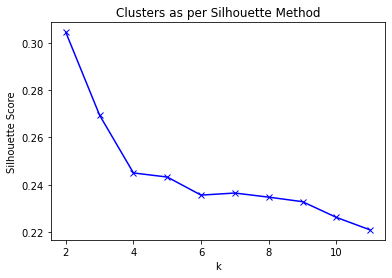

Enter number of clusters for the silhouette graph: 2


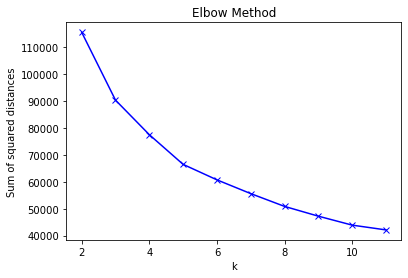

Enter number of clusters for the elbow graph: 3
Best performing clustering F1-score is: 0.4987435478852706 for n_clusters = 2
Run  8  is now complete...
-------------------------------
Run number:  9


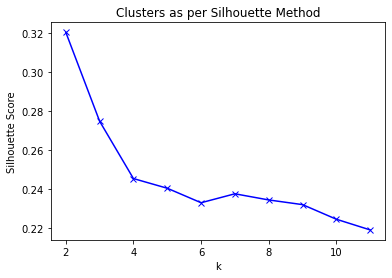

Enter number of clusters for the silhouette graph: 2


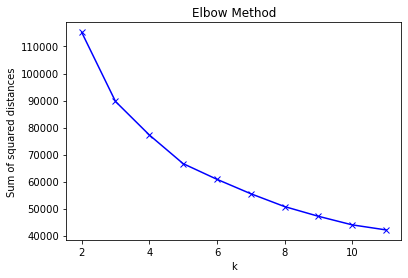

Enter number of clusters for the elbow graph: 5
Best performing clustering F1-score is: 0.2544622049589055 for n_clusters = 2
Run  9  is now complete...
-------------------------------
Run number:  10


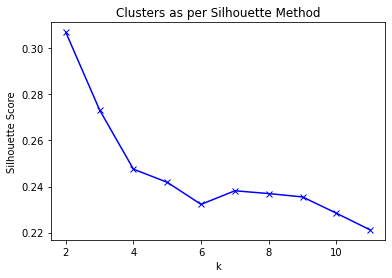

Enter number of clusters for the silhouette graph: 2


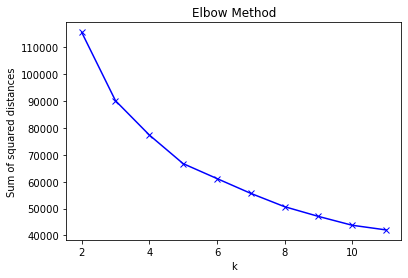

Enter number of clusters for the elbow graph: 5
Best performing clustering F1-score is: 0.5025635482833927 for n_clusters = 2
Run  10  is now complete...
-------------------------------


In [46]:
from sklearn.model_selection import StratifiedKFold
X = np.array(X_df)
y = np.array(Y_df)

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)

y_predicted_list = []
y_true_list = []

m = list(skf.split(X,y))

run = 0
for train_index, test_index in m:
    run += 1
    print("Run number: ", run)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    k, chosen_km = select_clusters_from_sil_elbow(X_train, y_train)
    clfs = trainingClusters(X_train, y_train, k, chosen_km)
    y_predicted_list.append(testingClusters(X_test, chosen_km, clfs))
    y_true_list.append(y_test)
    print("Run ", run, " is now complete...")
    print("-------------------------------")

In [47]:
Result = metrices(y_true_list, y_predicted_list)

Result:
RECALL: 0.9027 +/- 0.0001
PRECISION: 1.0000 +/- 0.0000
ACCURACY: 0.9027 +/- 0.0001
F1: 0.9489 +/- 0.0001


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is 

# 

### Box plots comparing the two models 

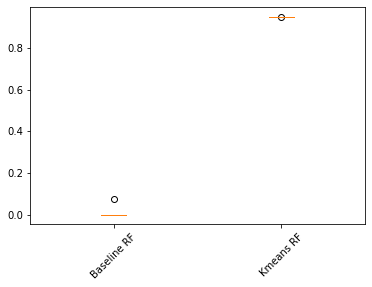

In [48]:
fig, ax = plt.subplots()
labels = ["Baseline RF", "Kmeans RF"]
ax.boxplot([base_scores, Result])
ax.set_xticklabels(labels, rotation=45)
plt.show()